# Shallow Parsing Chunker using Maximum Entropy Markov Model
***CS 626*** *Natural Language Processing*

**Maheer Maloth**,
<br/>
**Vineet Bhat**,
<br/>
**T Sanjev Vishnu**,
<br/>
*Indian Institute of Technology Bombay*

# Preprocessing

## Opening the files

In [1]:
training_file = open('assignment2dataset/train.txt',mode="r")
test_file = open('assignment2dataset/test.txt',mode="r")
training_raw_data = training_file.readlines()
test_raw_data = test_file.readlines()
training_data = []
test_data = []

## Adding chunk tag (B/I/O) and creating a new training data 

In [2]:
for new_line in training_raw_data:
    new_line = new_line.split()
    if len(new_line) is not 0 :
        chunk_tag = new_line[2][0]
        new_line.pop()
        new_line.append(chunk_tag)
        training_data.append(new_line)
        #print(new_line)

In [3]:
#print(training_data)
print(len(training_data))

211727


## Adding chunk tag (B/I/O) and creating a new training data 

In [4]:
for new_line in test_raw_data:
    new_line = new_line.split()
    if len(new_line) is not 0 :
        chunk_tag = new_line[2][0]
        new_line.pop()
        new_line.append(chunk_tag)
        test_data.append(new_line)
        #print(new_line)

In [5]:
#print(test_data)

## Counting number of B, I, O tags in the training data set

In [6]:
count_O = 0
count_I = 0
count_B = 0
for line in training_data :
    if line[2] == 'O':
        count_O += 1
    if line[2] == 'I':
        count_I += 1
    if line[2] == 'B':
        count_B += 1
print(count_B, count_I, count_O)
print("Total Number of Words: ", count_B + count_I + count_O)

106978 76847 27902
Total Number of Words:  211727


## Forming a list of sentences which are lists in itself containing words

In [7]:
def getSentences(train_data,test_data):
    sentence_labels = []
    sentence = []
    train_sentences = []
    train_labels = []
    for x in train_data:
        if(x[1]!='.'):
            sentence.append(x)
            sentence_labels.append(x[2])
        else:
            sentence.append(x)
            sentence_labels.append(x[2])
            train_sentences.append(sentence)
            train_labels.append(sentence_labels)
            sentence_labels = []
            sentence = []
    
    sentence = []
    sentence_labels = []
    test_sentences = []
    test_labels = []
    for x in test_data:
        if(x[1]!='.'):
            sentence.append(x)
            sentence_labels.append(x[2])
        else:
            sentence.append(x)
            sentence_labels.append(x[2])
            test_sentences.append(sentence)
            test_labels.append(sentence_labels)
            sentence_labels = []
            sentence = []
    print("Train Sentences: "+str(len(train_sentences)))
    print("Test Sentences: "+str(len(test_sentences)))
    
    return train_sentences,train_labels,test_sentences,test_labels

In [8]:
train_sentences,train_labels,test_sentences,test_labels = getSentences(training_data,test_data)

Train Sentences: 8827
Test Sentences: 1975


# Featuresets

In [9]:
from nltk.stem import PorterStemmer

In [10]:
ps = PorterStemmer()
def word2features(sent, i):
    word = sent[i][0]
    postag = sent[i][1]
    
    features = {
        'bias': 1.0,
        'word.lower()': word.lower(),
        'word_stem':ps.stem(word),
        'word.isupper()': word.isupper(),
        'word.istitle()': word.istitle(),
        'word.isdigit()': word.isdigit(),
        #'postag': postag,
        'prefix1':word[0:1],
        'prefix2':word[0:2],
        'suffix1':word[-2:],
        'suffix2':word[-3:],
        'suffix3':word[-4:],
        
    }

    
    if i > 0:
        word1 = sent[i-1][0]
        postag1 = sent[i-1][1]
        chunktag1 = sent[i-1][2]
        features.update({
            '-1:word.lower()': word1.lower(),
            '-1:word_stem':ps.stem(word1),
            '-1:word.istitle()': word1.istitle(),
            '-1:word.isupper()': word1.isupper(),
            #'-1:postag': postag1,
            '-1:prefix1':word1[0:1],
            '-1:prefix2':word1[0:2],
            '-1:suffix1':word1[-2:],
            '-1:suffix2':word1[-3:],
            '-1:suffix3':word1[-4:],
            #'-1:chunktag':chunktag1
            
        })   
    else:
        features['SOS'] = True

    if i > 1:
        word1 = sent[i-2][0]
        postag1 = sent[i-2][1]
        chunktag1 = sent[i-2][2]
        features.update({
            '-2:word.lower()': word1.lower(),
            '-2:word_stem':ps.stem(word1),
            '-2:word.istitle()': word1.istitle(),
            '-2:word.isupper()': word1.isupper(),
            #'-2:postag': postag1,
            '-2:prefix1':word1[0:1],
            '-2:prefix2':word1[0:2],
            '-2:suffix1':word1[-2:],
            '-2:suffix2':word1[-3:],
            '-2:suffix3':word1[-4:],
            #'-2:chunktag':chunktag1
            
        })   
    else:
        if(i==1):
            features['SecondWord'] = True  
            
    if i > 2:
        word1 = sent[i-3][0]
        postag1 = sent[i-3][1]
        chunktag1 = sent[i-3][2]
        features.update({
            '-3:word.lower()': word1.lower(),
            '-3:word_stem':ps.stem(word1),
            '-3:word.istitle()': word1.istitle(),
            '-3:word.isupper()': word1.isupper(),
            #'-3:postag': postag1,
            '-3:prefix1':word1[0:1],
            '-3:prefix2':word1[0:2],
            '-3:suffix1':word1[-2:],
            '-3:suffix2':word1[-3:],
            '-3:suffix3':word1[-4:],
            #'-3:chunktag':chunktag1
            
        })   
    else:
        if(i==2):
            features['ThirdWord'] = True 
            
    if i > 2:
        word1 = sent[i-4][0]
        postag1 = sent[i-4][1]
        chunktag1 = sent[i-4][2]
        features.update({
            '-4:word.lower()': word1.lower(),
            '-4:word_stem':ps.stem(word1),
            '-4:word.istitle()': word1.istitle(),
            '-4:word.isupper()': word1.isupper(),
            #'-4:postag': postag1,
            '-4:prefix1':word1[0:1],
            '-4:prefix2':word1[0:2],
            '-4:suffix1':word1[-2:],
            '-4:suffix2':word1[-3:],
            '-4:suffix3':word1[-4:],
            #'-4:chunktag':chunktag1
            
        })   
    else:
        if(i==3):
            features['FourthWord'] = True 
        
    if i < len(sent)-1:
        word1 = sent[i+1][0]
        postag1 = sent[i+1][1]
        chunktag1 = sent[i+1][2]
        features.update({
            '+1:word.lower()': word1.lower(),
            '+1:word_stem':ps.stem(word1),
            '+1:word.istitle()': word1.istitle(),
            '+1:word.isupper()': word1.isupper(),
            #'+1:postag': postag1,
            '+1:prefix1':word1[0:1],
            '+1:prefix2':word1[0:2],
            '+1:suffix1':word1[-2:],
            '+1:suffix2':word1[-3:],
            '+1:suffix3':word1[-4:],
            #'+1:chunktag':chunktag1
        })
    else:
        features['EOS'] = True
        

    return features

In [11]:
def sent2features(sent):
    return [word2features(sent, i) for i in range(len(sent))]

In [12]:
def sent2labels(sent):
    return [label for token, postag, label in sent]

In [13]:
def sent2tokens(sent):
    return [token for token, postag, label in sent]

In [14]:
X_test = [sent2features(s) for s in test_sentences]

In [15]:
y_test = [sent2labels(s) for s in test_sentences]

In [16]:
y_train = [sent2labels(s) for s in train_sentences]

In [17]:
X_train = [sent2features(s) for s in train_sentences]

In [18]:
for feature, value in X_test[0][5].items():
    print ("{:<20} {:<15} ".format(feature, value))

bias                 1.0             
word.lower()         unit            
word_stem            unit            
word.isupper()       0               
word.istitle()       0               
word.isdigit()       0               
prefix1              u               
prefix2              un              
suffix1              it              
suffix2              nit             
suffix3              unit            
-1:word.lower()      tulsa           
-1:word_stem         tulsa           
-1:word.istitle()    1               
-1:word.isupper()    0               
-1:prefix1           T               
-1:prefix2           Tu              
-1:suffix1           sa              
-1:suffix2           lsa             
-1:suffix3           ulsa            
-2:word.lower()      's              
-2:word_stem         's              
-2:word.istitle()    0               
-2:word.isupper()    0               
-2:prefix1           '               
-2:prefix2           's              
-2:suffix1  

# Label Encoding
Not necessary <br/>
Heavily consumes memory <br />
Time taken is unreasonably high <br />
~ 25 hours

### Using Label Encoder to convert the feature set into numbers

In [19]:
"""
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(values)
"""

'\nfrom sklearn import preprocessing\nle = preprocessing.LabelEncoder()\nle.fit(values)\n'

### Checking if the transformer gives the same output for the same features 

In [20]:
"""
d = le.transform(["I","am","a","good","boy"])
e = le.transform(["I", "am", "in", "love"])
f = le.transform(["I","$","to","kiss", "you","in", "capital"])
c = le.classes_
print(d)
print(e)
print(f)
print(len(le.classes_))
"""

'\nd = le.transform(["I","am","a","good","boy"])\ne = le.transform(["I", "am", "in", "love"])\nf = le.transform(["I","$","to","kiss", "you","in", "capital"])\nc = le.classes_\nprint(d)\nprint(e)\nprint(f)\nprint(len(le.classes_))\n'

# The MEMM Chunker 

## Creating Training Data

In [21]:
len(X_train)

8827

In [22]:
tr_data = []

for sent in range(len(X_train)):
    for word in range(len(X_train[sent])):
        #print(sent, word)
        new_tuple = (X_train[sent][word], y_train[sent][word])
        tr_data.append(new_tuple)

In [23]:
print(len(tr_data))

211727


In [24]:
print(tr_data[26])

({'bias': 1.0, 'word.lower()': 'a', 'word_stem': 'a', 'word.isupper()': False, 'word.istitle()': False, 'word.isdigit()': False, 'prefix1': 'a', 'prefix2': 'a', 'suffix1': 'a', 'suffix2': 'a', 'suffix3': 'a', '-1:word.lower()': 'show', '-1:word_stem': 'show', '-1:word.istitle()': False, '-1:word.isupper()': False, '-1:prefix1': 's', '-1:prefix2': 'sh', '-1:suffix1': 'ow', '-1:suffix2': 'how', '-1:suffix3': 'show', '-2:word.lower()': 'to', '-2:word_stem': 'to', '-2:word.istitle()': False, '-2:word.isupper()': False, '-2:prefix1': 't', '-2:prefix2': 'to', '-2:suffix1': 'to', '-2:suffix2': 'to', '-2:suffix3': 'to', '-3:word.lower()': 'fail', '-3:word_stem': 'fail', '-3:word.istitle()': False, '-3:word.isupper()': False, '-3:prefix1': 'f', '-3:prefix2': 'fa', '-3:suffix1': 'il', '-3:suffix2': 'ail', '-3:suffix3': 'fail', '-4:word.lower()': ',', '-4:word_stem': ',', '-4:word.istitle()': False, '-4:word.isupper()': False, '-4:prefix1': ',', '-4:prefix2': ',', '-4:suffix1': ',', '-4:suffix2':

## Creating Test Data

In [25]:
ts_data = []

for sent in range(len(X_test)):
    for word in range(len(X_test[sent])):
        #print(sent, word)
        new_tuple = (X_test[sent][word])
        ts_data.append(new_tuple)

In [26]:
type(ts_data[0].items())

dict_items

In [27]:
ts_labels = []

for sent in y_test:
    for word in sent:
        ts_labels.append(word)

## Importing Maxent Classifier NLTK

In [28]:
import nltk
nltk.usage(nltk.classify.ClassifierI)

ClassifierI supports the following operations:
  - self.classify(featureset)
  - self.classify_many(featuresets)
  - self.labels()
  - self.prob_classify(featureset)
  - self.prob_classify_many(featuresets)


In [29]:
from nltk.classify import MaxentClassifier as mc

## Training the dataset 

In [30]:
import timeit

In [31]:
start = timeit.default_timer()
a = mc.train(train_toks= tr_data ,trace=0, max_iter=1)
stop = timeit.default_timer()

print("Time : ", stop-start)

Time :  174.350399568


In [32]:
print(len(ts_labels), len(ts_data))

47377 47377


## Predicting the labels 

In [33]:
pred_labels = []
for i in range(len(ts_data)):

    probability_distribution = a.prob_classify(ts_data[i])
    #print('%8.5f%8.5f%8.5f' % (probability_distribution.prob('B'), probability_distribution.prob('I'), probability_distribution.prob('O')), end=' ')
    max = 0
    if(probability_distribution.prob('B')>max):
        max = probability_distribution.prob('B')
        label = 'B'
    if(probability_distribution.prob('I')>max):
        max = probability_distribution.prob('I')
        label = 'I'
    if(probability_distribution.prob('O')>max):
        max = probability_distribution.prob('O')
        label = 'O'
    pred_labels.append(label)
    #print(label, ts_labels[i])

In [34]:
ts_data[1]

{'bias': 1.0,
 'word.lower()': 'international',
 'word_stem': 'intern',
 'word.isupper()': False,
 'word.istitle()': True,
 'word.isdigit()': False,
 'prefix1': 'I',
 'prefix2': 'In',
 'suffix1': 'al',
 'suffix2': 'nal',
 'suffix3': 'onal',
 '-1:word.lower()': 'rockwell',
 '-1:word_stem': 'rockwel',
 '-1:word.istitle()': True,
 '-1:word.isupper()': False,
 '-1:prefix1': 'R',
 '-1:prefix2': 'Ro',
 '-1:suffix1': 'll',
 '-1:suffix2': 'ell',
 '-1:suffix3': 'well',
 'SecondWord': True,
 '+1:word.lower()': 'corp.',
 '+1:word_stem': 'corp.',
 '+1:word.istitle()': True,
 '+1:word.isupper()': False,
 '+1:prefix1': 'C',
 '+1:prefix2': 'Co',
 '+1:suffix1': 'p.',
 '+1:suffix2': 'rp.',
 '+1:suffix3': 'orp.'}

## Metrics to measure effectiveness of the model 

In [35]:
import matplotlib.pyplot as plt

In [36]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [37]:
confusion_matrixs = confusion_matrix(ts_labels, pred_labels)

In [38]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Oranges')

    plt.figure(figsize=(8, 6))

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

### Accuracy

In [39]:
B_identified = confusion_matrixs[0][0]/sum(confusion_matrixs[0])
I_identified = confusion_matrixs[1][1]/sum(confusion_matrixs[1])
O_identified = confusion_matrixs[2][2]/sum(confusion_matrixs[2])
print("Accuracy of B (correctly identified) : ", B_identified*100)
print("Accuracy of I (correctly identified) : ", I_identified*100)
print("Accuracy of O (correctly identified) : ", O_identified*100)
print("Overall Accuracy of the MEMM Chunker : ",accuracy_score(ts_labels, pred_labels)*100)

Accuracy of B (correctly identified) :  99.16988093241656
Accuracy of I (correctly identified) :  63.80513116171807
Accuracy of O (correctly identified) :  7.84789644012945
Overall Accuracy of the MEMM Chunker :  74.31031935327267


### Heat Map ( Confusion Matrix )

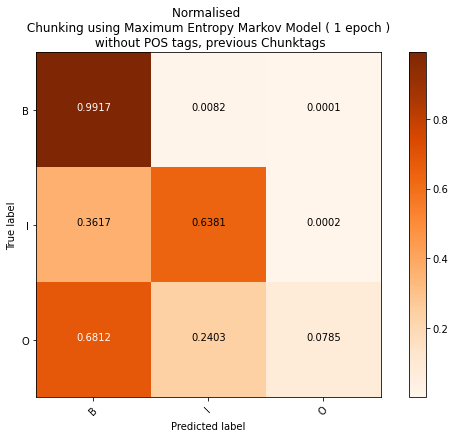

In [40]:
plot_confusion_matrix(confusion_matrixs, target_names=['B','I','O'], title='Normalised \n Chunking using Maximum Entropy Markov Model ( 1 epoch ) \n without POS tags, previous Chunktags', normalize=True)

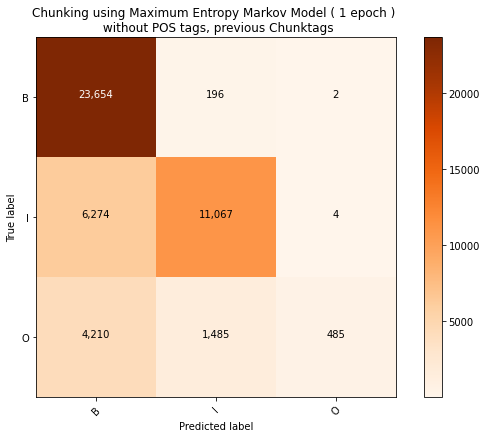

In [41]:
plot_confusion_matrix(confusion_matrixs, target_names=['B','I','O'], title='Chunking using Maximum Entropy Markov Model ( 1 epoch ) \n without POS tags, previous Chunktags', normalize=False)